In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
Loans = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [285]:
Loans.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


## Logistic Regression Model

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [287]:
X = Loans.drop(['default','customer_id'],axis = 1)
y = Loans['default']

In [288]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=123)

In [290]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

preds = log_reg.predict_proba(X_test)
preds

array([[8.78164343e-01, 1.21835657e-01],
       [9.99999944e-01, 5.63849660e-08],
       [9.99999994e-01, 6.46643624e-09],
       ...,
       [9.99999974e-01, 2.61452090e-08],
       [9.99999999e-01, 5.33041426e-10],
       [9.28570110e-10, 9.99999999e-01]])

Text(0.5, 1.0, 'Confusion Matrix')

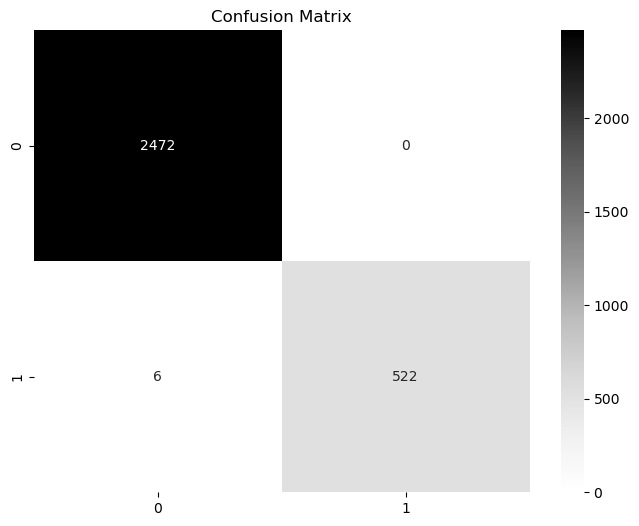

In [291]:
y_preds = log_reg.predict(X_test)

cmat = confusion_matrix (y_test,y_preds)

plt.figure(figsize = (8,6))
sns.heatmap(cmat,annot=True,fmt='g',cmap='Greys')
plt.title('Confusion Matrix')

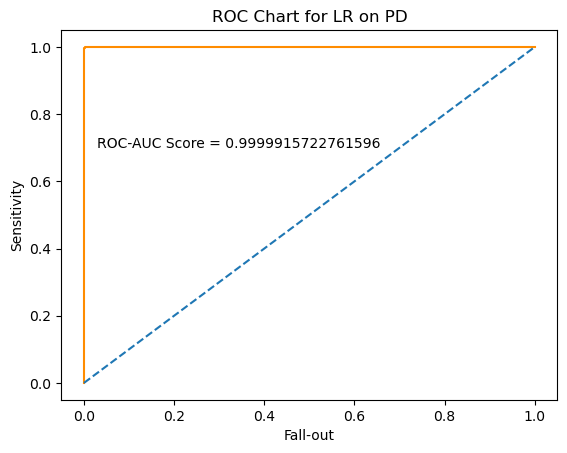

In [292]:
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
rocauc = roc_auc_score(y_test, prob_default)
logistic = plt.plot(fallout, sensitivity, color = 'darkorange')
no_skill = plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.annotate(f'ROC-AUC Score = {rocauc}',xy=(0.03,0.7))
plt.show()

In [293]:
features = X.columns
coefs = log_reg.coef_[0]
coef_df = pd.DataFrame({'Features':features,'Coefficients':coefs})
coef_df

,Features,Coefficients
0,credit_lines_outstanding,8.480291
1,loan_amt_outstanding,0.111738
2,total_debt_outstanding,3.394049
3,income,-2.131737
4,years_employed,-2.864337
5,fico_score,-1.089845


In [324]:
def expected_loss(model,scaler,features,recovery_rate): # function for predicting expected loss

    # features to be given in usual order
    scaled_features = scaler.transform([features])
    prob_default = model.predict_proba(scaled_features)[:,1][0]
    exp_loss = prob_default * (1-recovery_rate) * features[1]

    return exp_loss

In [326]:
# test case

features = [5,2128.1812,6721.23444,30142.8238,3,501]
recovery_rate = 0.1
expected_loss(log_reg,scaler,features,recovery_rate)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1915.3587300637387